In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [2]:
df = pd.read_excel('C:/Users/vasam/Downloads/loan.xlsx')
df.head()

,Loan ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0    Loan ID           614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Null Values

In [4]:
df.isnull().sum()

 Loan ID              0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

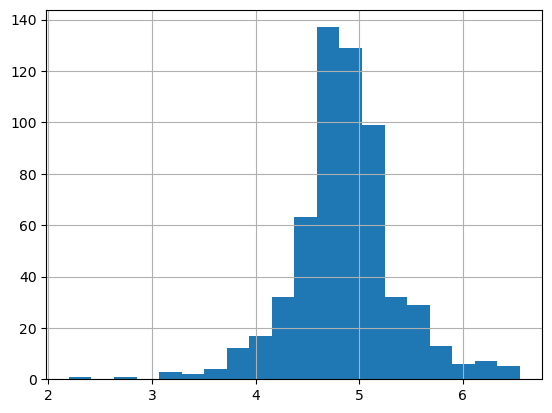

In [5]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

<AxesSubplot:>

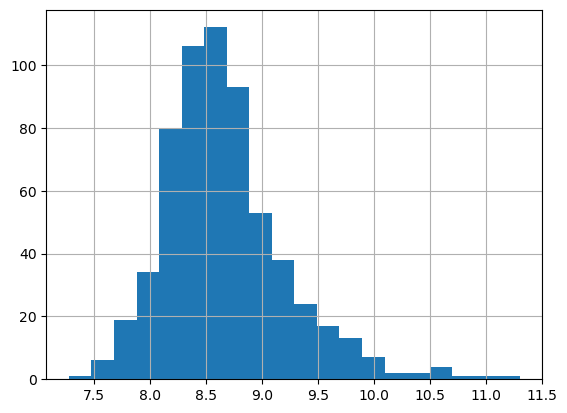

In [6]:
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']
df['TotalIncome']=np.log(df['TotalIncome'])
df['TotalIncome'].hist(bins=20)

In [7]:
df.isnull().sum()

 Loan ID              0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
TotalIncome           0
dtype: int64

# Replacing Null values By Mode and Mean

In [8]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df.LoanAmount.mean(),inplace=True)
df['LoanAmount_log'].fillna(df['LoanAmount_log'].mean(),inplace=True)

In [9]:
df.isnull().sum()

 Loan ID             0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
dtype: int64

In [10]:
x = df.iloc[:,np.r_[1:5,9:11,13:15]].values
y = df.iloc[:,12].values

In [11]:
x

array([['Male', 'No', 0, ..., 1.0, 4.857444178729353, 8.674025985443025],
       ['Male', 'Yes', 1, ..., 1.0, 4.852030263919617, 8.714567550836485],
       ['Male', 'Yes', 0, ..., 1.0, 4.189654742026425, 8.006367567650246],
       ...,
       ['Male', 'Yes', 1, ..., 1.0, 5.53338948872752, 9.025455532779063],
       ['Male', 'Yes', 2, ..., 1.0, 5.231108616854587, 8.933664178700935],
       ['Female', 'No', 0, ..., 0.0, 4.890349128221754,
        8.430109084509125]], dtype=object)

In [12]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

Number of people who takes loan as group by gender
Male      502
Female    112
Name: Gender, dtype: int64


<AxesSubplot:xlabel='Gender', ylabel='count'>

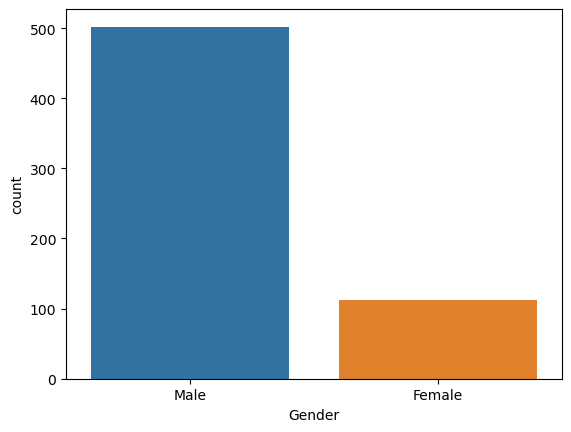

In [13]:
print('Number of people who takes loan as group by gender')
print(df['Gender'].value_counts())
sns.countplot(x='Gender',data=df)

Number of people who takes loan as group by Dependents
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


<AxesSubplot:xlabel='Dependents', ylabel='count'>

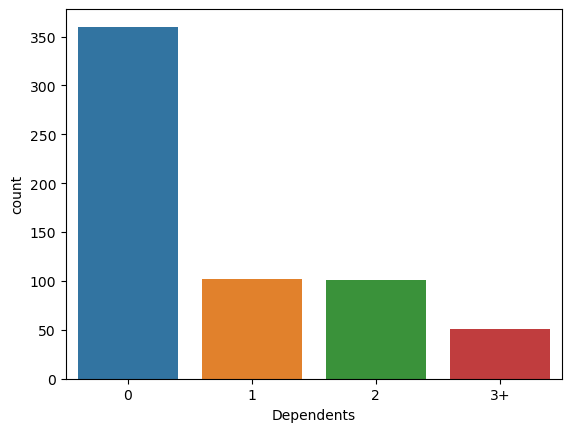

In [14]:
print('Number of people who takes loan as group by Dependents')
print(df['Dependents'].value_counts())
sns.countplot(x='Dependents',data=df)

Number of people who takes loan as group by self employed
No     532
Yes     82
Name: Self_Employed, dtype: int64


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

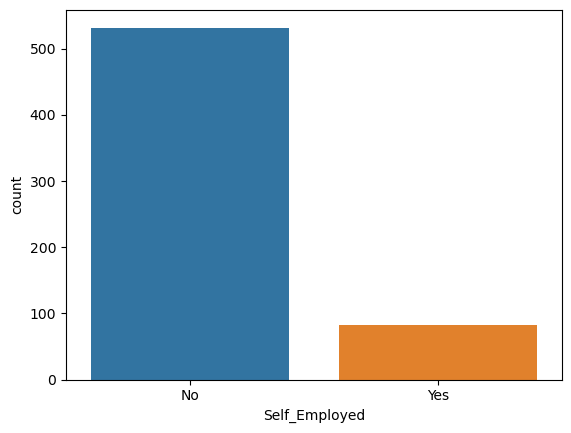

In [15]:
print('Number of people who takes loan as group by self employed')
print(df['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed',data=df)

Number of people who takes loan as group by LoanAmount
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: LoanAmount, Length: 204, dtype: int64


<AxesSubplot:xlabel='LoanAmount', ylabel='count'>

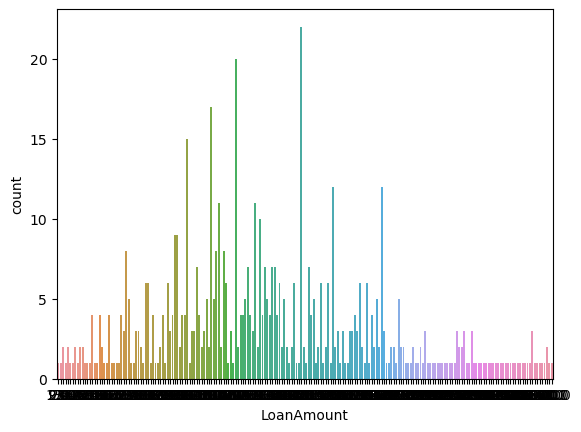

In [16]:
print('Number of people who takes loan as group by LoanAmount')
print(df['LoanAmount'].value_counts())
sns.countplot(x='LoanAmount',data=df)

# Splitting dataset into Training and Testing

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# Preprocessing Data

In [18]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()


In [23]:
for i in range(0,5):
    x_train[:,i] = labelencoder.fit_transform(x_train[:,i].astype(float))
    x_train[:,7] = labelencoder.fit_transform(x_train[:,7].astype(float))

In [24]:
x_train

array([[1, 1, 0, ..., 1.0, 4.875197323201151, 331],
       [1, 0, 1, ..., 1.0, 5.278114659230517, 8],
       [1, 1, 0, ..., 0.0, 5.003946305945459, 303],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 312],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 387],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 338]], dtype=object)

In [26]:
for i in range(0,5):
    y_train = labelencoder.fit_transform(y_train)
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [32]:
for i in range(0,5):
    x_test[:,i]=labelencoder.fit_transform(x_test[:,i].astype(int))
    x_test[:,7]=labelencoder.fit_transform(x_test[:,7].astype(int))
x_test

array([[1, 0, 0, 0, 4, 1.0, 4.430816798843313, 111],
       [0, 0, 0, 0, 4, 1.0, 4.718498871295094, 81],
       [1, 1, 0, 0, 4, 1.0, 5.780743515792329, 92],
       [1, 1, 0, 0, 4, 1.0, 4.700480365792417, 51],
       [1, 1, 2, 0, 4, 1.0, 4.574710978503383, 41],
       [1, 1, 0, 1, 2, 0.0, 5.10594547390058, 12],
       [1, 1, 3, 0, 2, 1.0, 5.056245805348308, 99],
       [1, 0, 0, 0, 4, 1.0, 6.003887067106539, 78],
       [1, 0, 0, 0, 4, 0.0, 4.820281565605037, 109],
       [1, 1, 0, 0, 4, 1.0, 4.852030263919617, 116],
       [0, 0, 0, 0, 4, 1.0, 4.430816798843313, 95],
       [1, 1, 1, 0, 4, 1.0, 4.553876891600541, 7],
       [0, 0, 0, 0, 4, 1.0, 5.634789603169249, 120],
       [1, 1, 2, 0, 4, 1.0, 5.4638318050256105, 14],
       [1, 1, 0, 0, 4, 1.0, 4.564348191467836, 25],
       [1, 1, 1, 0, 4, 1.0, 4.204692619390966, 41],
       [1, 0, 1, 1, 4, 1.0, 5.247024072160486, 16],
       [1, 0, 0, 1, 4, 1.0, 4.882801922586371, 75],
       [0, 0, 0, 0, 4, 1.0, 4.532599493153256, 1],
       [1,

In [33]:
y_test = labelencoder.fit_transform(y_test)
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [34]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

# Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [36]:
from sklearn.metrics import accuracy_score
y_pred = rfc.predict(x_test)
print('accuracy of using random forest classifier is ',accuracy_score(y_pred,y_test))

accuracy of using random forest classifier is  0.7642276422764228


# Naive Bayes Classifier

In [37]:
from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB()
nbc.fit(x_train,y_train)

GaussianNB()

In [38]:
y_pred = nbc.predict(x_test)

In [39]:
print('accuracy of using naive bayes is ',accuracy_score(y_pred,y_test))

accuracy of using naive bayes is  0.8292682926829268


# Decision Tree Classifier

In [40]:
from sklearn.tree import DecisionTreeClassifier
dfc = DecisionTreeClassifier()
dfc.fit(x_train,y_train)

DecisionTreeClassifier()

In [41]:
y_pred=dfc.predict(x_test)
print('accuracy of using decision tree classifier is',accuracy_score(y_pred,y_test))

accuracy of using decision tree classifier is 0.7073170731707317


# KNN Classifier

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [45]:
y_pred = knn.predict(x_test)
print('accuracy of using knn classifier is ',accuracy_score(y_pred,y_test))

accuracy of using knn classifier is  0.7804878048780488


C:\Users\vasam\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Support Vector Machine

In [46]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train,y_train)

SVC()

In [48]:
y_pred = svm.predict(x_test)
print('accuracy of using svm is ',accuracy_score(y_pred,y_test))

accuracy of using svm is  0.8292682926829268


Hence, Naive Bayes Classifier and Support Vector Machine is best suited algorithms for this model